<a href="https://colab.research.google.com/github/orinbou/MathPythonColab/blob/main/chapter/%E7%AC%AC4%E5%9B%9E%E3%80%80Matplotlib%E3%81%A7%E6%8A%98%E3%82%8C%E7%B7%9A%E3%82%B0%E3%83%A9%E3%83%95%EF%BC%88%E6%AD%A3%E8%A6%8F%E5%88%86%E5%B8%83%E3%81%AA%E3%81%A9%EF%BC%89%E3%82%92%E6%8F%8F%E3%81%93%E3%81%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 目標1： シグモイド関数のグラフを描く

## 1. シグモイド関数の定義とグラフの簡単な描き方（基礎知識）

In [ ]:
%%latex
\displaystyle
y = \frac{1}{1 + exp(-x)}

<IPython.core.display.Latex object>

In [ ]:
from math import exp
def sigmoid(x):
  return 1/(1 + exp(-x))

In [ ]:
print(sigmoid(-6))

0.0024726231566347743


In [ ]:
print(sigmoid(0))

0.5


## 2. シグモイド関数のグラフを描く（プログラムの作成）

In [ ]:
import numpy as np
def sigmoid(x):
  return 1/(1 + np.exp(-x)) #NumPyのexp関数を使う

In [ ]:
def makedata(xmin, xmax):
  x = np.arange(xmin, xmax, 0.01)
  y = sigmoid(x) # xはNumPyの配列なので、対応するyがすべて求められる
  return x, y

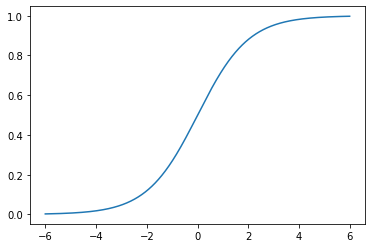

In [ ]:
import matplotlib.pyplot as plt
x, y = makedata(-6, 6)
plt.plot(x, y)

# 目標2： 任意の関数のグラフを任意の刻み幅で描く（関数を引数として渡す）

## 3. 任意の関数のグラフを任意の刻み幅で描く（プログラムの作成）

In [ ]:
import numpy as np
from math import gamma
def normdist(x):
  mu = 50 # 平均
  sigma = 10 # 標準偏差
  return 1/(np.sqrt(2*np.pi) * sigma) * np.exp(-(x-mu)**2 / (2*sigma**2))

def betadist(x):
  a = 2 # αの値
  b = 5 # βの値
  return x**(a-1) * (1-x)**(b-1) / beta(a, b)

def beta(a, b): # ベータ関数の定義
  return gamma(a)*gamma(b) / (gamma(a+b))

In [ ]:
def makedata(func, xmin, xmax, step): # 関数の参照をfunc引数で受け取る
  x = np.arange(xmin, xmax, step)
  y = func(x) # funcで参照される関数を呼び出す
  return x, y

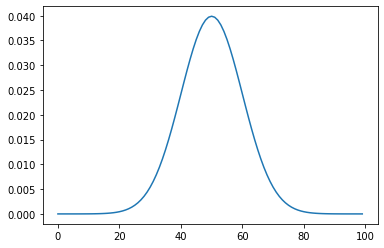

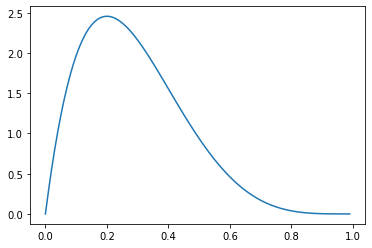

In [ ]:
import matplotlib.pyplot as plt
x, y = makedata(normdist, 0, 100, 1)
plt.plot(x, y)
plt.show() # 正規分布のグラフを表示

x, y = makedata(betadist, 0, 1, 0.01)
plt.plot(x, y)
plt.show() # ベータ分布のグラフを表示

## 4. 可変個の引数を使って、関数の係数や定数項を自由に指定する

In [ ]:
import numpy as np
from math import gamma
def normdist(x, mu=0, sigma=1):
  return 1/(np.sqrt(2*np.pi) * sigma) * np.exp(-(x-mu)**2 / (2*sigma**2))

def betadist(x, a, b):
  return x**(a-1) * (1-x)**(b-1) / beta(a, b)

def beta(a, b): # ベータ関数の定義
  return gamma(a)*gamma(b) / (gamma(a+b))

In [ ]:
def makedata2(func, xmin, xmax, step, **args): # **argsは可変個の引数
  x = np.arange(xmin, xmax, step)
  y = func(x, **args)
  return x, y

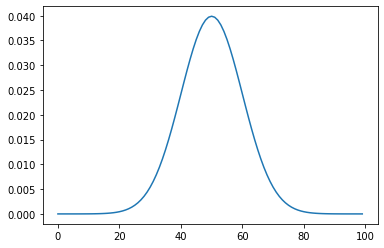

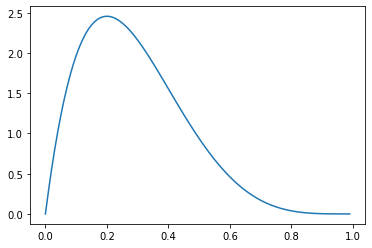

In [ ]:
import matplotlib.pyplot as plt
args = {'mu': 50, 'sigma': 10}
x, y = makedata2(normdist, 0, 100, 1, **args)
plt.plot(x, y)
plt.show() # 正規分布のグラフを表示

args = {'a': 2, 'b': 5}
x, y = makedata2(betadist, 0, 1, 0.01, **args)
plt.plot(x, y)
plt.show() # ベータ分布のグラフを表示

## 5. 3Dグラフの作成

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a, b = 3, 2

theta = np.arange(0, 6*np.pi, 0.1) # 6πまで0.1刻みでθの配列を作る
x = a*np.cos(theta)
y = a*np.sin(theta)
z = b*theta

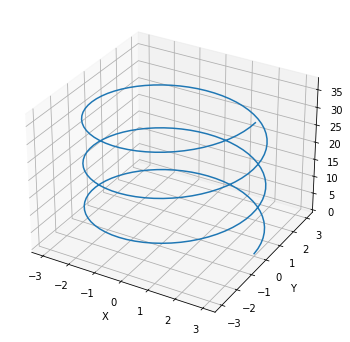

In [ ]:
plt.figure(figsize=[8, 6]) # サイズを幅8インチ、高さ6インチとする
ax = plt.subplot(projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.plot(x, y, z)
plt.show()

# 練習問題と解答例

## （1）フーリエ級数を利用して矩形波を描画する例

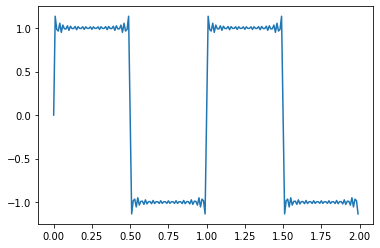

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fourier(x, f, kmax):
  tmp = 0
  for k in range(kmax):
    tmp += np.sin(2*(1+2*k)*np.pi*f*x) / (1+2*k)
  return tmp * 4 / np.pi

args = {'f': 1, 'kmax': 20} # 周波数と繰り返し数を指定する
x, y = makedata(fourier, 0, 2, 0.01, **args)
plt.plot(x, y)

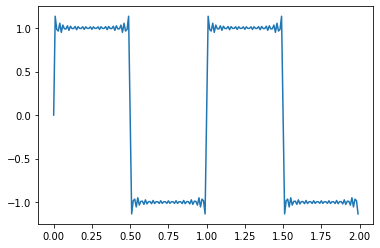

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fourier2(x, f, kmax):
  tmp = sum([np.sin(2*(1+2*k)*np.pi*f*x) / (1+2*k) for k in range(kmax)])
  return tmp * 4 / np.pi

args = {'f': 1, 'kmax': 20} # 周波数と繰り返し数を指定する
x, y = makedata(fourier2, 0, 2, 0.01, **args)
plt.plot(x, y)

## （2）多変数関数で表された曲面のグラフを描く

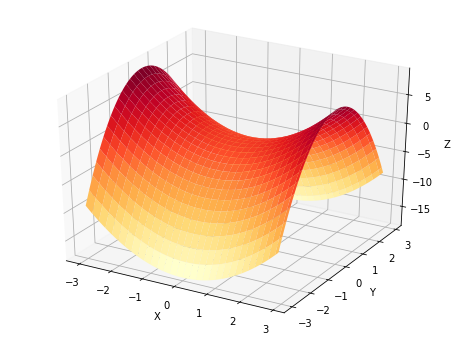

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
x, y = np.meshgrid(x, y) # 座標の配列を作る
z = x**2 - 2*y**2 # 多変数関数式

plt.figure(figsize=[8, 6]) # サイズを幅8インチ、高さ6インチとする
ax = plt.subplot(projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.plot_surface(x, y, z, cmap='YlOrRd') # カラーマップは黄色から赤
plt.show()